In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## Univariate Analysis

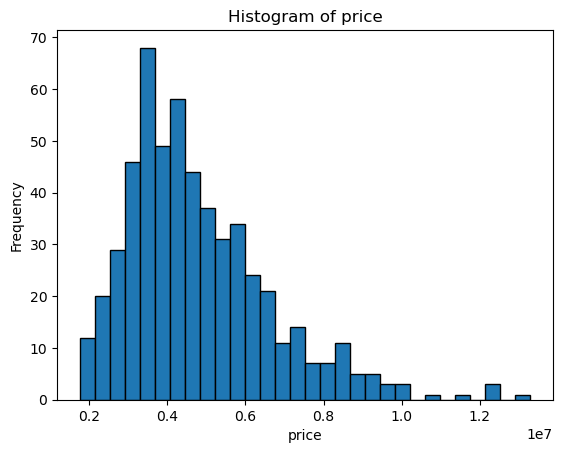

In [4]:
plt.hist(data['price'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

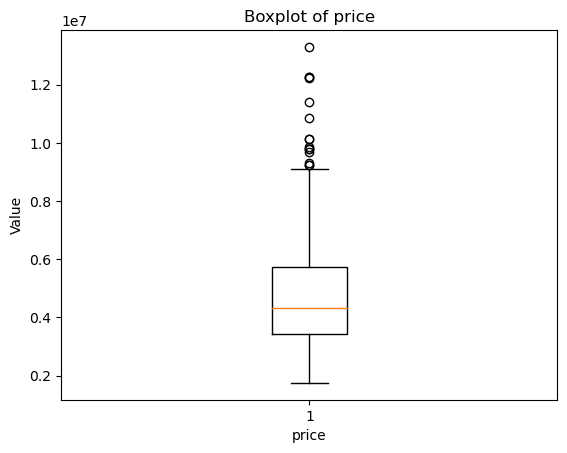

In [5]:
plt.boxplot(data['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.ylabel('Value')
plt.show()

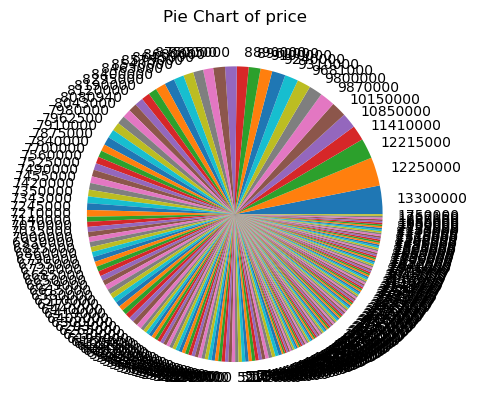

In [6]:
plt.pie(data['price'].value_counts(), labels=data['price'].unique())
plt.title('Pie Chart of price')
plt.show()

## Bi - Variate Analysis

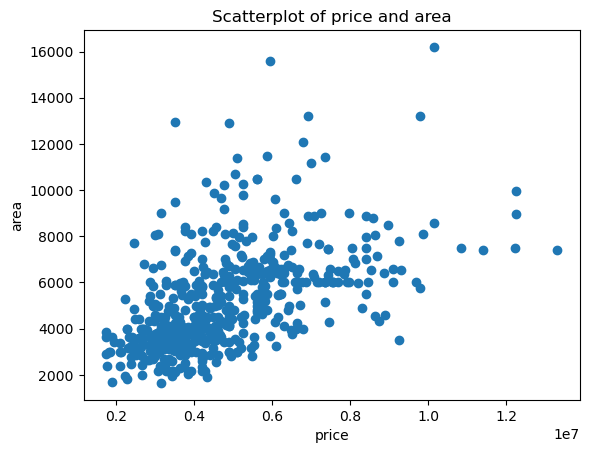

In [7]:
plt.scatter(data['price'], data['area'])
plt.title('Scatterplot of price and area')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

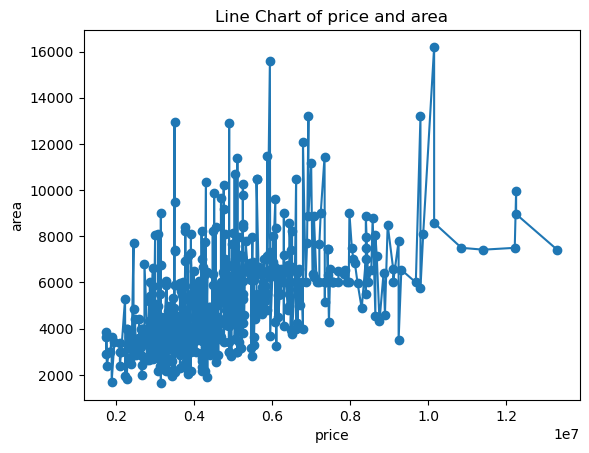

In [8]:
plt.plot(data['price'], data['area'], 'o-')
plt.title('Line Chart of price and area')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

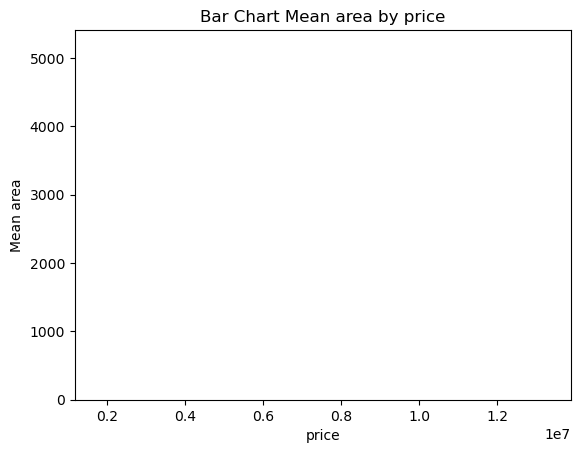

In [9]:
plt.bar(data['price'].unique(), data['area'].mean(), align='center')
plt.title('Bar Chart Mean area by price')
plt.xlabel('price')
plt.ylabel('Mean area')
plt.show()

In [10]:
## Multi - Variate Analysis

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_868/628386860.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


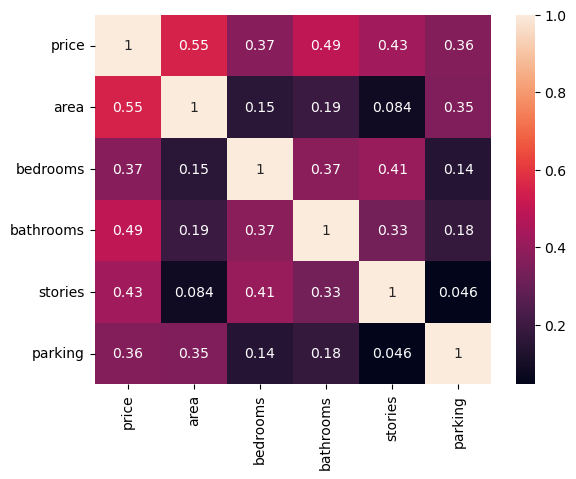

In [11]:
data['price'] = data['price'].astype('category').cat.codes
sns.heatmap(data.corr(), annot=True)
plt.show()

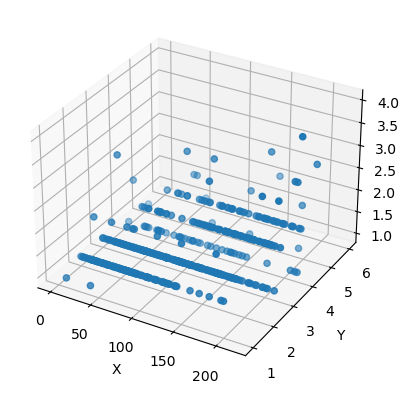

In [12]:
from mpl_toolkits.mplot3d import Axes3D
x = data['price']
y = data['bedrooms']
z = data['bathrooms']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [13]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


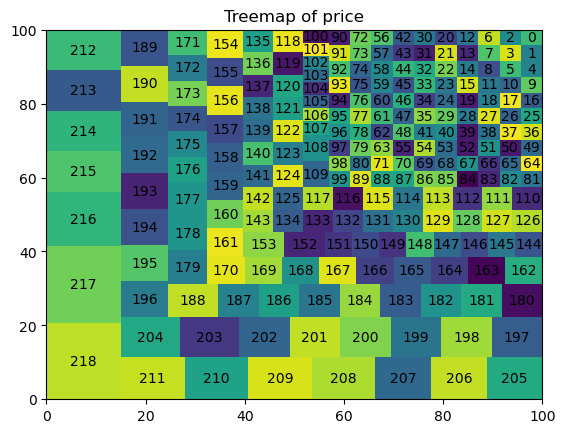

In [14]:
import squarify
plt.figure()
squarify.plot(data['price'].value_counts(), label=data['price'].unique())
plt.title('Treemap of price')
plt.show()

In [15]:
numeric_stats = data.describe()
print("Numeric Descriptive Statistics:")
print(numeric_stats)

categorical_stats = data.describe(include='object')
print("\nCategorical Descriptive Statistics:")
print(categorical_stats)

Numeric Descriptive Statistics:
            price          area    bedrooms   bathrooms     stories  \
count  545.000000    545.000000  545.000000  545.000000  545.000000   
mean    95.728440   5150.541284    2.965138    1.286239    1.805505   
std     56.256108   2170.141023    0.738064    0.502470    0.867492   
min      0.000000   1650.000000    1.000000    1.000000    1.000000   
25%     51.000000   3600.000000    2.000000    1.000000    1.000000   
50%     87.000000   4600.000000    3.000000    1.000000    2.000000   
75%    137.000000   6360.000000    3.000000    2.000000    2.000000   
max    218.000000  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  

Categorical Descriptive Statistics:
       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

## Missing Values

In [16]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

## Outliers and Replace the Outliers

In [18]:
target_column = 'price'
Q1 = data[target_column].quantile(0.25)
Q3 = data[target_column].quantile(0.75)
IQR = Q3 - Q1

In [19]:
IQR

86.0

In [20]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
print(lower_bound)
print(upper_bound)

-78.0
266.0


In [22]:
outliers = data[(data[target_column] < lower_bound) | (data[target_column] > upper_bound)]

In [23]:
median_value = data[target_column].median()
data.loc[(data[target_column] < lower_bound) | (data[target_column] > upper_bound), target_column] = median_value

In [24]:
median_value

87.0

In [25]:
print(data)

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0      218  7420         4          2        3      yes        no       no   
1      217  8960         4          4        4      yes        no       no   
2      217  9960         3          2        2      yes        no      yes   
3      216  7500         4          2        2      yes        no      yes   
4      215  7420         4          1        2      yes       yes      yes   
..     ...   ...       ...        ...      ...      ...       ...      ...   
540      2  3000         2          1        1      yes        no      yes   
541      1  2400         3          1        1       no        no       no   
542      0  3620         2          1        1      yes        no       no   
543      0  2910         3          1        1       no        no       no   
544      0  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking furnishingstatus  

## Categorical Columns and Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
data.dtypes

price                int16
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [28]:
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [29]:
print(data_encoded)

     price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0      218  7420         4          2        3        2            0   
1      217  8960         4          4        4        3            0   
2      217  9960         3          2        2        2            0   
3      216  7500         4          2        2        3            0   
4      215  7420         4          1        2        2            0   
..     ...   ...       ...        ...      ...      ...          ...   
540      2  3000         2          1        1        2            0   
541      1  2400         3          1        1        0            1   
542      0  3620         2          1        1        0            0   
543      0  2910         3          1        1        0            1   
544      0  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0               1             1              0            

## Split - Dependent amd Independent

In [30]:
# dependent and independent variables (8)
dependent_variable = 'price'
independent_variables = data.drop(dependent_variable, axis=1)
dependent_variable = data[dependent_variable]

In [31]:
print(independent_variables)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking furnishingstatus  
0                no             yes        2        furnished  
1                no

## Scale the Independent Variables

In [32]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['price', 'bedrooms', 'bathrooms', 'area', 'stories', 'parking']
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [33]:
print(data)

        price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0    2.175477  1.046726  1.403419   1.421812  1.378217      yes        no   
1    2.157685  1.757010  1.403419   5.405809  2.532024      yes        no   
2    2.157685  2.218232  0.047278   1.421812  0.224410      yes        no   
3    2.139893  1.083624  1.403419   1.421812  0.224410      yes        no   
4    2.122101  1.046726  1.403419  -0.570187  0.224410      yes       yes   
..        ...       ...       ...        ...       ...      ...       ...   
540 -1.667633 -0.991879 -1.308863  -0.570187 -0.929397      yes        no   
541 -1.685425 -1.268613  0.047278  -0.570187 -0.929397       no        no   
542 -1.703217 -0.705921 -1.308863  -0.570187 -0.929397      yes        no   
543 -1.703217 -1.033389  0.047278  -0.570187 -0.929397       no        no   
544 -1.703217 -0.599839  0.047278  -0.570187  0.224410      yes        no   

    basement hotwaterheating airconditioning   parking furnishingstatus  
0

## Data Split 

In [34]:
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1)  
y = data['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
X_train


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
167,-0.253922,-1.308863,1.421812,-0.929397,yes,no,no,no,yes,1.517692,semi-furnished
368,0.225750,-1.308863,-0.570187,-0.929397,no,no,no,no,no,-0.805741,semi-furnished
301,-0.752043,0.047278,-0.570187,0.224410,yes,no,no,no,no,-0.805741,semi-furnished
527,-1.528742,-1.308863,-0.570187,-0.929397,no,no,yes,no,no,-0.805741,semi-furnished
382,-0.922695,0.047278,-0.570187,0.224410,yes,no,yes,no,no,-0.805741,furnished
...,...,...,...,...,...,...,...,...,...,...,...
71,0.391790,1.403419,1.421812,2.532024,yes,no,no,no,yes,-0.805741,unfurnished
106,0.138117,1.403419,1.421812,-0.929397,yes,no,yes,no,yes,-0.805741,semi-furnished
270,-0.300045,0.047278,1.421812,1.378217,yes,no,no,yes,no,0.355976,furnished
435,-0.512207,-1.308863,-0.570187,-0.929397,yes,no,no,no,no,-0.805741,unfurnished


In [36]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
316,0.345668,1.403419,1.421812,0.224410,no,no,yes,no,no,0.355976,unfurnished
77,0.622401,0.047278,1.421812,1.378217,yes,no,no,no,yes,-0.805741,furnished
360,-0.512207,-1.308863,-0.570187,-0.929397,yes,no,no,no,no,-0.805741,semi-furnished
90,-0.069433,0.047278,-0.570187,0.224410,yes,no,no,no,yes,-0.805741,semi-furnished
493,-0.549105,0.047278,-0.570187,-0.929397,yes,no,no,no,no,-0.805741,furnished
...,...,...,...,...,...,...,...,...,...,...,...
172,1.498725,0.047278,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,unfurnished
124,0.633932,0.047278,1.421812,2.532024,yes,no,no,no,no,0.355976,furnished
388,-0.692084,0.047278,-0.570187,0.224410,yes,no,no,no,no,-0.805741,unfurnished
521,-0.699002,-1.308863,-0.570187,-0.929397,no,no,no,no,no,-0.805741,unfurnished


In [37]:
y_train

167    0.520805
368   -0.635687
301   -0.262051
527   -1.525296
382   -0.706855
         ...   
71     1.285868
106    0.983401
270   -0.155298
435   -0.920362
102    1.001194
Name: price, Length: 408, dtype: float64

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
data['mainroad']=le.fit_transform(data['mainroad'])
data['guestroom']=le.fit_transform(data['guestroom'])
data['basement']=le.fit_transform(data['basement'])
data['hotwaterheating']=le.fit_transform(data['hotwaterheating'])
data['airconditioning']=le.fit_transform(data['airconditioning'])
data['furnishingstatus']=le.fit_transform(data['furnishingstatus'])

In [40]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,2.175477,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,0
1,2.157685,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,2.157685,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,2.139893,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,0
4,2.122101,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


## Building The Model

In [41]:
#building the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, data['price'], test_size=0.25)

In [42]:
model.fit(X_train,y_train)

LinearRegression()

## Training the model 

In [43]:
X_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
284,-0.226467,1.208154,-1.308863,-0.570187,-0.929397,1,0,0,0,0,0.355976,0
423,-0.849193,-0.645962,0.047278,-0.570187,-0.929397,1,0,0,0,0,-0.805741,2
86,1.161323,0.700809,0.047278,-0.570187,1.378217,1,0,1,0,0,-0.805741,2
492,-1.276205,-1.153307,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,2
487,-1.222829,0.115056,1.403419,-0.570187,0.224410,1,0,0,0,0,-0.805741,2
...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.262051,-1.013556,0.047278,-0.570187,0.224410,1,0,1,0,1,-0.805741,2
531,-1.560880,0.068934,0.047278,-0.570187,-0.929397,0,0,0,0,1,-0.805741,2
42,1.606128,0.613177,0.047278,1.421812,2.532024,1,0,0,0,1,1.517692,2
431,-0.920362,-0.908859,1.403419,-0.570187,0.224410,1,0,1,0,1,-0.805741,2


In [44]:
y_train

284   -0.226467
423   -0.849193
86     1.161323
492   -1.276205
487   -1.222829
         ...   
291   -0.262051
531   -1.560880
42     1.606128
431   -0.920362
98     1.054570
Name: price, Length: 408, dtype: float64

## Testing the Model

In [45]:
score = model.score(X_test, y_test)

In [46]:
print(score)

1.0


In [47]:
predictions = model.predict(X_test)

In [48]:
print(predictions)

[-0.03075272 -0.63568678 -1.13386777 -0.79581638 -0.60010242 -1.47191916
  0.69872659  0.41405174 -1.06269906 -0.84919292  1.35703719  1.00119362
  1.80184164 -0.90256945  0.78768748 -1.57867223 -0.74243985 -1.70321748
 -0.01296054  0.50301263 -0.29763539  1.64171204  0.2005456  -1.06269906
 -0.15529797  1.71288075  2.13989303 -0.26205104  0.18275342 -1.52529569
  0.66314223  1.74846511 -0.68906331 -0.70685549 -1.11607559 -0.99153035
 -0.01296054 -0.0485449   0.25392213 -0.03075272 -1.29399738 -0.74243985
 -1.20503648  0.39625956 -0.74243985 -0.26205104  0.41405174  0.50301263
  1.07236233 -0.74243985 -0.97373817 -0.97373817 -0.58231025 -1.20503648
  0.44963609 -1.52529569  0.71651877  0.89444055 -0.84919292  0.62755788
 -0.99153035 -0.92036163  0.50301263  1.94417907  0.25392213  1.49937461
 -1.32958173 -0.60010242 -1.22282866  2.15768521  0.82327184  0.02262382
 -0.22646668  0.6097657  -0.74243985 -1.13386777 -0.74243985 -0.54672589
  0.37846738 -0.90256945  0.37846738 -0.60010242  0

## Measuring the performance

In [49]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
y_pred = model.predict(X_test)

In [50]:
error=y_test-y_pred

In [51]:
error

257   -1.082467e-15
368   -5.551115e-16
468   -8.881784e-16
413    2.442491e-15
362   -9.992007e-16
           ...     
109   -1.110223e-16
162    3.219647e-15
491   -6.661338e-16
130    1.998401e-15
401    2.331468e-15
Name: price, Length: 137, dtype: float64

In [52]:
se=error*error

In [53]:
se

257    1.171736e-30
368    3.081488e-31
468    7.888609e-31
413    5.965761e-30
362    9.984021e-31
           ...     
109    1.232595e-32
162    1.036613e-29
491    4.437343e-31
130    3.993608e-30
401    5.435745e-30
Name: price, Length: 137, dtype: float64

In [54]:
mse=np.mean(se)

In [55]:
mse

3.768340864822555e-30

In [56]:
mse2=mean_squared_error(y_test,y_pred)

In [57]:
mse2

3.768340864822555e-30

In [58]:
mae=mean_absolute_error(y_test,y_pred)
mae

1.5215170972286502e-15

In [59]:
rmse=np.sqrt(mse2)
rmse

1.941221487832482e-15

In [60]:
r2=r2_score(y_test,y_pred)
r2

1.0